In [18]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')


In [19]:
df = pd.read_csv(r'\\corp.hertshtengroup.com\Users\India\Data\anmol.chopra\Documents\FF Codes\Futures-First\Metals\data\copper inventory.csv')
df

,Timestamp,Last Quote Close,Daily change
0,8/7/2024,19711,2550.0
1,8/6/2024,17161,961.0
2,8/5/2024,16200,336.0
3,8/2/2024,15864,838.0
4,8/1/2024,15026,306.0
...,...,...,...
5908,9/10/2001,187090,NaN
5909,9/7/2001,187090,NaN
5910,9/6/2001,186921,NaN
5911,9/5/2001,186921,NaN


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Add a 'Year' column to the DataFrame
df['Year'] = df['Timestamp'].dt.year

df = df.sort_values('Timestamp')

fig = go.Figure()

# Iterate through each unique year and create a trace for that year
for year in df['Timestamp'].dt.year.unique():
    year_data = df[df['Timestamp'].dt.year == year]
    fig.add_trace(go.Scatter(x=year_data['Timestamp'], y=year_data['Last Quote Close'], mode='lines', name=str(year)))

# Customize the layout
fig.update_layout(
    title='Stock Price Trends',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_tickformat='%Y-%m-%d',
    xaxis_rangeslider_visible=False,
    height=600,
    width=800,
    template='plotly_white'
)

# Show the interactive plot
fig.show()

In [21]:
# Plotting yearwise
df_year = df[df['Timestamp'].dt.year == 2023]
df_year['Timestamp'] = pd.to_datetime(df_year['Timestamp'])  # Convert to datetime

# Create the figure
fig = go.Figure()

# Add trace
fig.add_trace(go.Scatter(x=df_year['Timestamp'], y=df_year['Last Quote Close'], mode='lines+markers', name='Inventory'))

# Update layout
fig.update_layout(
    title='Inventory',
    xaxis_title='Date',
    yaxis_title='Stock',
    xaxis_rangeslider_visible=False,  # Hides range slider
    template='plotly_white'  # Sets the background to white
)

# Show plot
fig.show()

            Last Quote Close  Daily change  Year
Timestamp                                       
2001-09-04            186846           NaN  2001
2001-09-05            186921           NaN  2001
2001-09-06            186921           NaN  2001
2001-09-07            187090           NaN  2001
2001-09-10            187090           NaN  2001
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5913 entries, 2001-09-04 to 2024-08-07
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Last Quote Close  5913 non-null   int64  
 1   Daily change      1281 non-null   float64
 2   Year              5913 non-null   int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 161.7 KB
None
       Last Quote Close  Daily change         Year
count       5913.000000   1281.000000  5913.000000
mean       89976.500085    -16.474629  2012.635718
std        94165.792272    555.417510     6.614344
min         3681.000000  -2

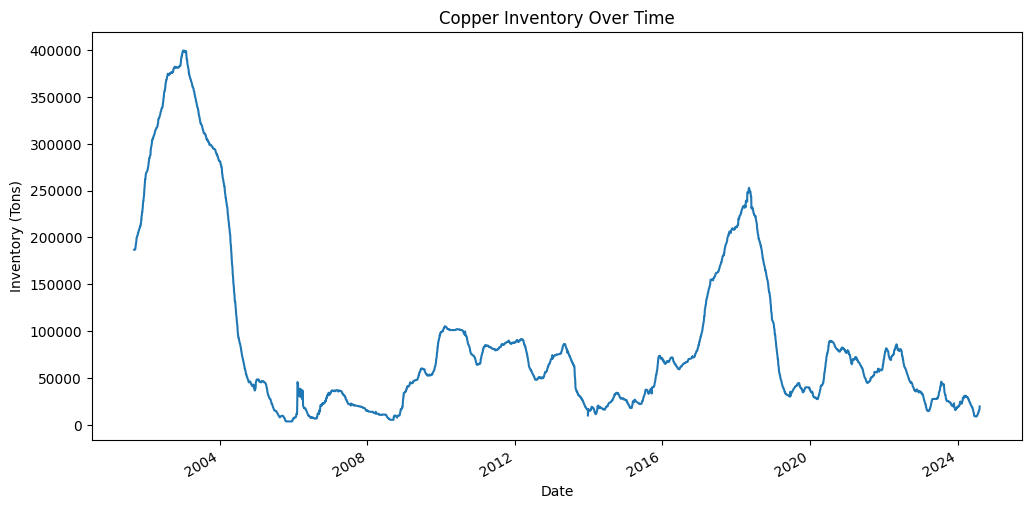

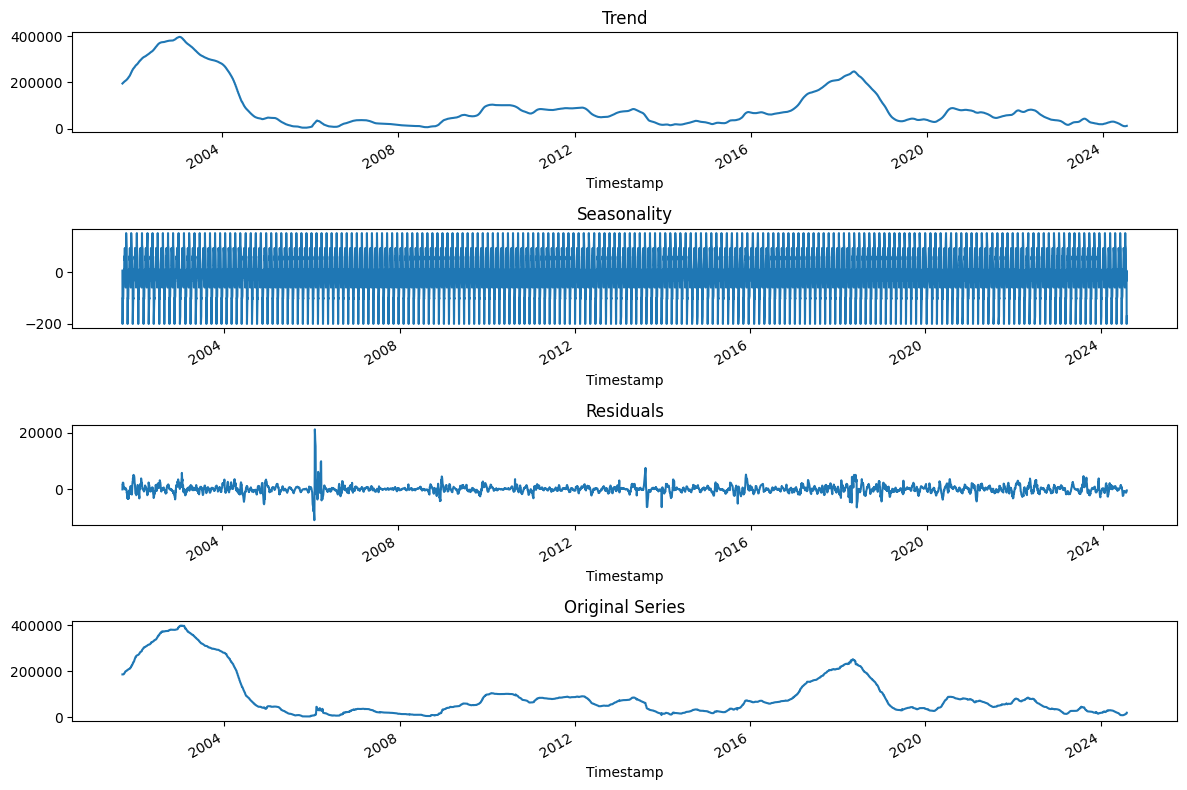

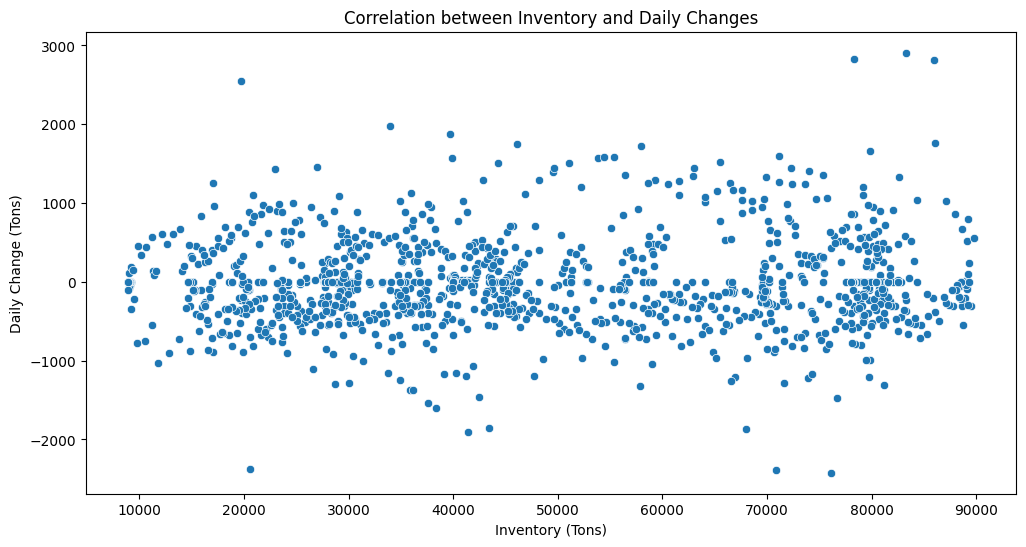

                               SARIMAX Results                                
Dep. Variable:       Last Quote Close   No. Observations:                 5913
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -47351.921
Date:                Fri, 09 Aug 2024   AIC                          94709.841
Time:                        12:49:53   BIC                          94729.896
Sample:                             0   HQIC                         94716.811
                               - 5913                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9747      0.002    526.173      0.000       0.971       0.978
ma.L1         -0.9327      0.003   -322.616      0.000      -0.938      -0.927
sigma2      5.066e+05   1012.931    500.174      0.0

In [22]:
# Set the 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Plot the copper inventory over time
plt.figure(figsize=(12, 6))
df['Last Quote Close'].plot()
plt.title('Copper Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory (Tons)')
plt.show()

# Analyze the trend and seasonality
decomp = seasonal_decompose(df['Last Quote Close'], model='additive', period=30)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomp.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomp.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomp.resid.plot(ax=ax3)
ax3.set_title('Residuals')
decomp.observed.plot(ax=ax4)
ax4.set_title('Original Series')
plt.tight_layout()
plt.show()

# Analyze the correlation between inventory and daily changes
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Last Quote Close', y='Daily change', data=df)
plt.title('Correlation between Inventory and Daily Changes')
plt.xlabel('Inventory (Tons)')
plt.ylabel('Daily Change (Tons)')
plt.show()

# Perform a time series analysis
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Last Quote Close'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())